This is for running the different Checking a single segment.


In [3]:
#initiate Model
using Mimi
using MimiCIAM
using CSV
using Plots

Open the csv file for lat long data and test if it works.

In [4]:
latlondata = CSV.File("seg_latlon_data.csv")


12148-element CSV.File:
 CSV.Row: (segments = String31("Canada5106"), segid = 5106, longi = -122.645, lati = 75.918)
 CSV.Row: (segments = String31("Canada5115"), segid = 5115, longi = -121.031, lati = 75.891)
 CSV.Row: (segments = String31("Canada5120"), segid = 5120, longi = -116.799, lati = 77.534)
 CSV.Row: (segments = String31("Canada5132"), segid = 5132, longi = -118.191, lati = 75.968)
 CSV.Row: (segments = String31("Canada5166"), segid = 5166, longi = -115.022, lati = 74.963)
 CSV.Row: (segments = String31("Canada5167"), segid = 5167, longi = -114.982, lati = 75.853)
 CSV.Row: (segments = String31("Canada5202"), segid = 5202, longi = -115.077, lati = 77.939)
 CSV.Row: (segments = String31("Canada5168"), segid = 5168, longi = -112.533, lati = 74.995)
 CSV.Row: (segments = String31("Canada5169"), segid = 5169, longi = -112.433, lati = 76.163)
 CSV.Row: (segments = String31("Canada5171"), segid = 5171, longi = -111.468, lati = 75.838)
 ⋮
 CSV.Row: (segments = String31("Peru3955"),

Make a new dict to house the values of the distances between segments and NOLA.The key will be the distances and the values will be the segment names. Also make a array that will hold just the distances. This will allow us to index through distances.

In [5]:
d_list = []
Dist = Dict{Float64, String31}()
print("Distance Dictionay = ",Dist)


Distance Dictionay = Dict{Float64, String31}()

Read through the csv and find the distances between each segment and NOLA. NOLA coordinates(29.95, -90.07)

In [6]:
for row in latlondata
    # Set variables
    seg = row.segments
    segid = row.segid
    lon = row.longi
    lat = row.lati
    nola_x = -90.07
    nola_y = 29.95
    # lat/long are radians so adjust to radians
    x = deg2rad(lon - nola_x) * cos(deg2rad((lat + nola_y)/2))
    y = deg2rad(lat - nola_y)
    # eliminate duplicates
    if lon < 0 && lat > 0
        # solve for the distance of each segment using distance formula
        dis = 6371000 * sqrt((x^2 + y^2)) # lat/lon values for NOLA are hard coded
        # add the distance to the empty dictionary with the name as the value aswell as a list for storage
        push!(d_list, dis)
        Add = Dict{Float64, String31}( dis => seg)
        merge!(Dist,Add)
    end
    
end
#println(Dist[d_list[1]])

Now set val variable with first value. index through distances and compare in order to find the lowest distance to NOLA.

In [7]:
close = minimum(d_list)
Dist[close]


"UnitedStates4623"

Create a subset csv file housing the single segment.

In [8]:
NOLA_subset = "/Users/dakes/OneDrive/Documents/GitHub/sDake-Mimi/learnCIAM/single_seg.csv"

"/Users/dakes/OneDrive/Documents/GitHub/sDake-Mimi/learnCIAM/single_seg.csv"

Edit ssp init files in order to run multiple models of the segment. To edit change subset collumn to say the NOLA subset. run get model using the updated initfiles.

In [9]:
# ssp1
m1 =MimiCIAM.get_model(initfile = "ssp1_init.csv")
run(m1)
y1 = m1[:slrcost,:NoAdaptCost]

20×1 Matrix{Union{Missing, Float64}}:
  3.2731996385611617
  4.17457399173459
  5.425230514984451
  6.688586141313915
  8.644192688176636
 10.57464586709307
 12.824952791990146
 15.270531354954706
 16.48014359669007
 16.976890337774716
 17.23868638946661
 16.890924856417627
  1.974173242477365
  2.024419483251835
  2.0398256973382125
  2.008649126932021
  1.9797135936089802
  1.5041524812739093
  1.2435159456496454
  1.2435159456496192

In [10]:
# ssp2
m2 =MimiCIAM.get_model(initfile = "ssp2_init.csv")
run(m2)
y2 = m2[:slrcost,:NoAdaptCost]

20×1 Matrix{Union{Missing, Float64}}:
  3.2731996385611617
  4.184965031527426
  5.380367245380017
  6.5133001171471
  8.262323585467321
  9.946034106784014
 11.887085365681092
 13.920971656805975
 14.827653427754115
 15.214048483481456
 15.450149214478518
 15.140663009965236
  1.7905420737223785
  1.8356686754145446
  1.8496152155783137
  1.8218671030424076
  1.796121188498671
  1.3706006039976348
  1.1374061583376684
  1.137406158337643

In [11]:
# ssp3
m3 =MimiCIAM.get_model(initfile = "ssp3_init.csv")
run(m3)
y3 = m3[:slrcost,:NoAdaptCost]

20×1 Matrix{Union{Missing, Float64}}:
 3.2731996385611617
 4.029796961912838
 4.815844048166454
 5.405946557516842
 6.3845590905622664
 7.176490829787187
 8.023853460080453
 8.79201464296034
 8.762316588821113
 8.422288304886095
 8.562019584065391
 8.40362671387043
 1.115832761210766
 1.1414160665022393
 1.1499836499375806
 1.1357648016332171
 1.1226180131470558
 0.8908984734886335
 0.7640125716964064
 0.7640125716963814

In [12]:
# ssp4
m4 =MimiCIAM.get_model(initfile = "ssp4_init.csv")
run(m4)
y4 = m4[:slrcost,:NoAdaptCost]

20×1 Matrix{Union{Missing, Float64}}:
  3.2731996385611617
  4.20076971668212
  5.367751365690797
  6.377652668627713
  7.925055165149392
  9.349246527232877
 10.926211725686013
 12.463410712134747
 12.87837835678813
 12.772410870687116
 12.974766179562412
 12.720867442399923
  1.5599079415151575
  1.5980695389499493
  1.6101664706122711
  1.5873942068966962
  1.566286224259318
  1.2108044780433098
  1.0160392989975984
  1.0160392989975724

In [13]:
# ssp5
m5 =MimiCIAM.get_model(initfile = "ssp5_init.csv")
run(m5)
y5 = m5[:slrcost,:NoAdaptCost]

20×1 Matrix{Union{Missing, Float64}}:
  3.2731996385611617
  4.2517304329488494
  5.8708399142468375
  7.880632037932827
 11.172605279743513
 15.024013380246442
 20.042293953169217
 26.17133704070948
 30.943361968515344
 35.01518685522412
 35.53107400283912
 34.77911927904845
  3.734264797079397
  3.8363034433477834
  3.8658183781720794
  3.798452813914852
  3.73580722677868
  2.7445409047990537
  2.2009956549816856
  2.200995654981657

create a plot with the different values from the various adapt costs.

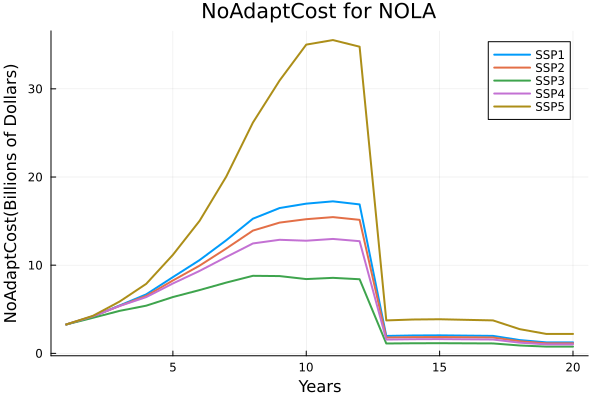

In [26]:
plot([y1, y2, y3, y4, y5], label = ["SSP1" "SSP2" "SSP3" "SSP4" "SSP5"], linewidth = 2)
title!("NoAdaptCost for NOLA")
xaxis!("Years")
yaxis!("NoAdaptCost(Billions of Dollars)")
#savefig("NOLA_NOA_SSP.svg")